In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as mt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("CarPrice.csv")
newdata=data.copy()
newdata.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data['CarName']=data['CarName'].apply(lambda name: name.split()[0])
data['total_mpg']=(data['citympg']+data['highwaympg'])/2
data.drop(['car_ID','citympg','highwaympg','symboling'],axis=1,inplace=True)

In [4]:
data.head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,total_mpg
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,24.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,24.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.5
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,27.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,20.0


In [5]:
data["CarName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [6]:
data["CarName"].replace("Nissan","nissan",inplace=True)
data["CarName"].replace("maxda","mazda",inplace=True)
data["CarName"].replace('porcshce','porsche',inplace=True)
data["CarName"].replace('toyouta','toyota',inplace=True)
data["CarName"].replace('vokswagen','volkswagen',inplace=True)
data["CarName"].replace('vw','volkswagen',inplace=True)
data["CarName"].replace('alfa-romero','alfa',inplace=True)


In [7]:
data["CarName"].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu',
       'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [8]:
data.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,total_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,13276.710571,27.985366
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,7988.852332,6.666038
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,5118.000000,15.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7788.000000,22.500000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,10295.000000,27.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,16503.000000,32.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,45400.000000,51.500000


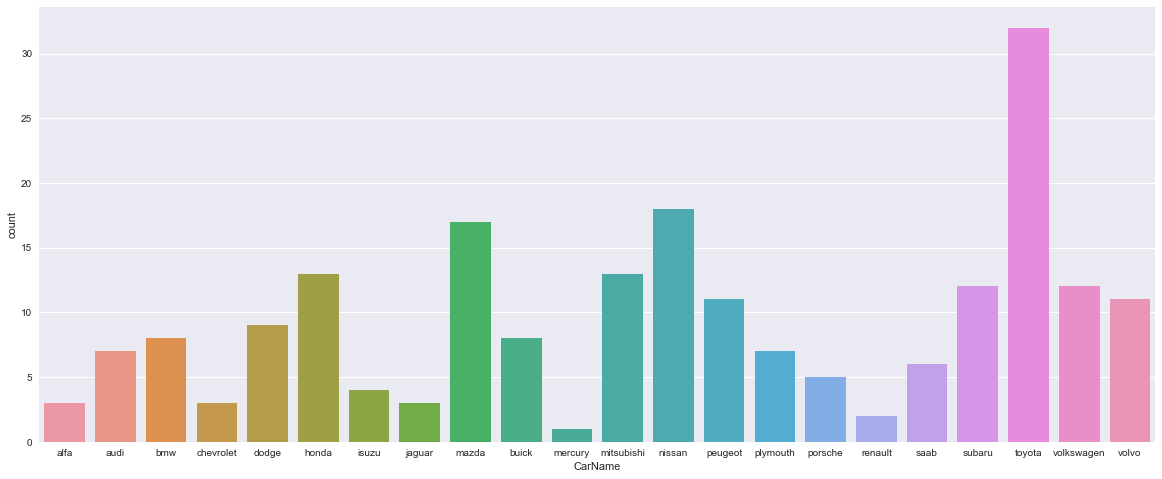

In [9]:
plt.figure(figsize=(20,8))
sns.set(style="darkgrid")
sns.countplot(data["CarName"])


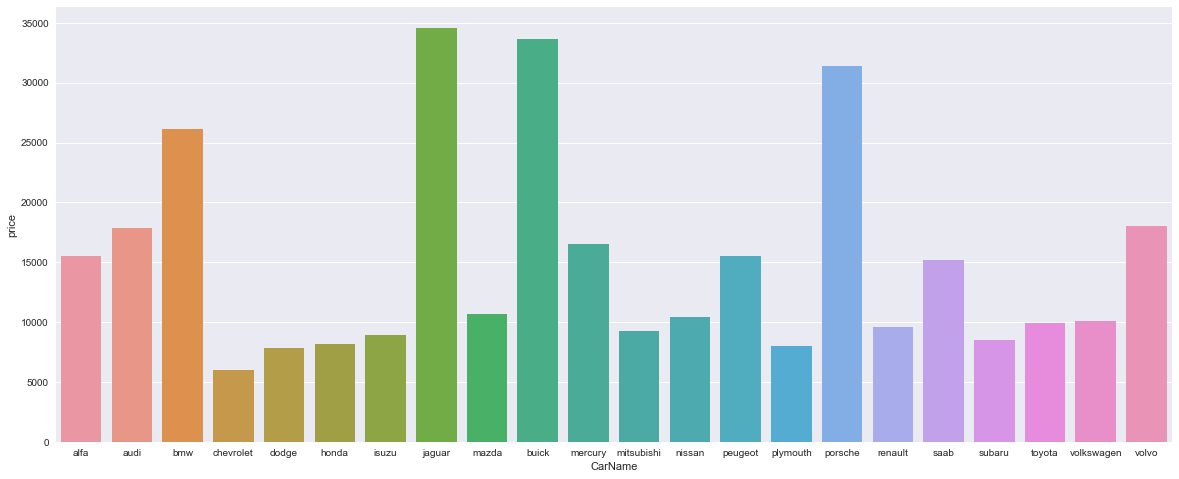

In [10]:
plt.figure(figsize=(20,8))
sns.barplot(x=data["CarName"],y=data["price"],ci=None)

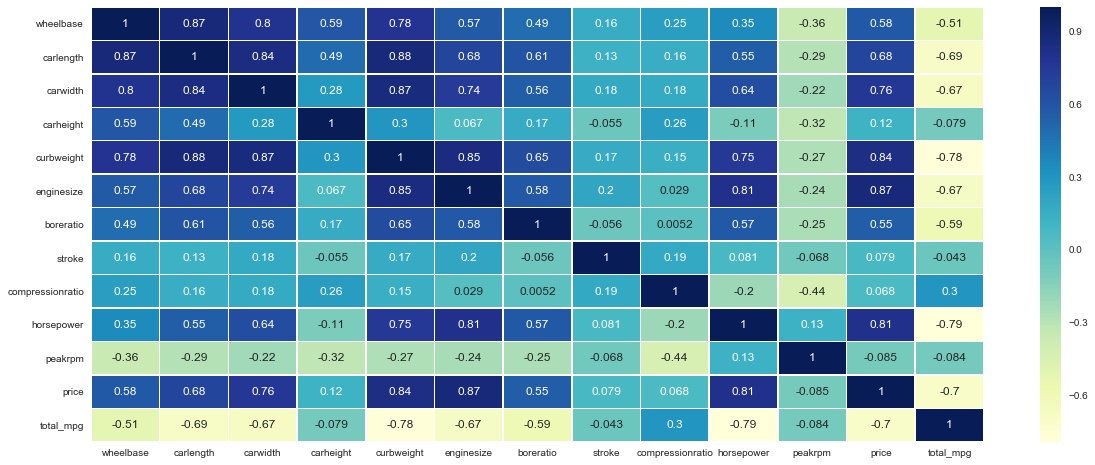

In [11]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True,linewidths=.5,cmap="YlGnBu")

In [12]:
newdata1=data[["curbweight","enginesize","horsepower","total_mpg"]]

In [13]:
newdata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
curbweight    205 non-null int64
enginesize    205 non-null int64
horsepower    205 non-null int64
total_mpg     205 non-null float64
dtypes: float64(1), int64(3)
memory usage: 6.5 KB


In [14]:
x=newdata1.iloc[:,0:].values
y=data["price"].values


In [15]:
import statsmodels.formula.api as sm
x=np.append(arr=np.ones((205,1)).astype(int),values=x,axis=1)
newx=x[:,0:]
reg=sm.OLS(endog=y,exog=newx).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     219.0
Date:                Thu, 12 Mar 2020   Prob (F-statistic):           7.00e-72
Time:                        02:05:44   Log-Likelihood:                -1960.0
No. Observations:                 205   AIC:                             3930.
Df Residuals:                     200   BIC:                             3947.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.548e+04   3934.594     -3.934      0.000   -2.32e+04   -7719.976
x1             4.5770      1.076      4.253      0.000       2.455       6.699
x2            82.6469     13.426      6.156      0.000      56.173     109.121
x3            52.7037     12.948      4.070      0.000      27.172      78.235
x4            38.6880     71.067      0.544      0.587    -101.449     178.825
==============================================================================
Omnibus:                       18.003   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.038
Skew:                           0.440   Prob(JB):                     4.06e-08
Kurtosis:                       4.792   Cond. No.                     4.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
newx=x[:,[0,1,2,3]]
reg=sm.OLS(endog=y,exog=newx).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     292.9
Date:                Thu, 12 Mar 2020   Prob (F-statistic):           4.36e-73
Time:                        02:05:45   Log-Likelihood:                -1960.2
No. Observations:                 205   AIC:                             3928.
Df Residuals:                     201   BIC:                             3942.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.346e+04   1333.051    -10.100      0.000   -1.61e+04   -1.08e+04
x1             4.2626      0.907      4.702      0.000       2.475       6.050
x2            84.8796     12.761      6.651      0.000      59.716     110.043
x3            48.7473     10.697      4.557      0.000      27.655      69.840
==============================================================================
Omnibus:                       17.983   Durbin-Watson:                   0.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.211
Skew:                           0.437   Prob(JB):                     3.73e-08
Kurtosis:                       4.800   Cond. No.                     1.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
x_train,x_test,y_train,y_test=train_test_split(newx,y,test_size=0.2,random_state=0)
reg1=LinearRegression()
reg1.fit(x_train,y_train)
y_pred=reg1.predict(x_test)

In [18]:
a={"actual":y_test.flatten(),"predicted":y_pred.flatten()}
df1=pd.DataFrame(a)
df1

,actual,predicted
0,6795.0,5585.545082
1,15750.0,21264.099772
2,15250.0,13951.668951
3,5151.0,379.713794
4,9995.0,10475.736665
5,11199.0,15800.308038
6,5389.0,5718.063941
7,7898.0,7079.850278
8,17199.0,22587.677874
9,6529.0,6261.171724


In [19]:
print("RMSE OF TRAINSET: ",(np.sqrt(mt.mean_squared_error(y_train,reg1.predict(x_train)))))
print(" RMSE OF TESTSET: ",(np.sqrt(mt.mean_squared_error(y_test,reg1.predict(x_test)))))
print("             MSE: ",(mt.mean_squared_error(y_test, y_pred)))
print("        R2_Score: ",(mt.r2_score(y_test, y_pred)))

RMSE OF TRAINSET:  3326.7836713622746
 RMSE OF TESTSET:  3894.8424786861083
             MSE:  15169797.933777748
        R2_Score:  0.8040491921585926


Text(0,0.5,'Car Price')

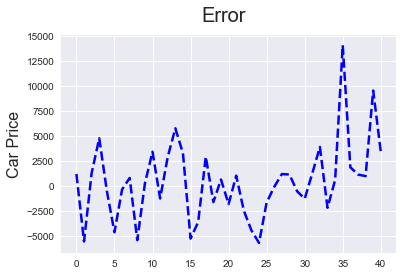

In [20]:
ind = [i for i in range(0,41,1)]
fig = plt.figure()
plt.plot(ind,y_test-y_pred, color="blue", linewidth=2.5, linestyle="--")
fig.suptitle('Error', fontsize=20)          
plt.ylabel('Car Price', fontsize=16) 